# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)

# Transformando Pokemon.csv em um DataFrame

In [3]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Mostrando só os lendários

In [4]:
df[df['Legendary'] == True].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


# Limpando os dados

### Eliminando repetição antes de Mega (Método 1)

In [5]:
def remove_mega(x):
    mega_position = x.find('Mega')
    if mega_position != -1:
        return x[mega_position:]
    else:
        return x

df['Name'].apply(remove_mega).head()

0        Bulbasaur
1          Ivysaur
2         Venusaur
3    Mega Venusaur
4       Charmander
Name: Name, dtype: object

### Eliminando repetição antes de Mega (Método 2)

In [6]:
df['Name'].str.replace('.*(?=Mega)', '').head()

0        Bulbasaur
1          Ivysaur
2         Venusaur
3    Mega Venusaur
4       Charmander
Name: Name, dtype: object

### Definindo 'Name' como índice

In [7]:
df['Name'] = df['Name'].str.replace('.*(?=Mega)', '')
df = df.set_index('Name')
df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


### Eliminando os lendários

In [8]:
df = df.drop(['#', 'Legendary'], axis=1)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
Charmander,Fire,NaN,309,39,52,43,60,50,65,1


### Informações básicas

In [9]:
print('As colunas do dataset são:\n', list(df.columns))
print('A forma do dataframe é:', df.shape)

As colunas do dataset são:
 ['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
A forma do dataframe é: (800, 10)


### Limpando valores Nan

In [10]:
df['Type 2'].fillna(df['Type 1'], inplace=True)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
Charmander,Fire,Fire,309,39,52,43,60,50,65,1


# Operações básicas

### Localizando objetos

In [11]:
print(df.loc['Bulbasaur'])  # Localiza com índice de nome Bulbasaur
print(df.iloc[0])  # Localiza o índice na posição 0

Type 1         Grass
Type 2        Poison
Total            318
HP                45
Attack            49
Defense           49
Sp. Atk           65
Sp. Def           65
Speed             45
Generation         1
Name: Bulbasaur, dtype: object
Type 1         Grass
Type 2        Poison
Total            318
HP                45
Attack            49
Defense           49
Sp. Atk           65
Sp. Def           65
Speed             45
Generation         1
Name: Bulbasaur, dtype: object


### Filtrando informações

In [12]:
df[
    ((df['Type 1'] == 'Fire') | (df['Type 1'] == 'Dragon')) &
    ((df['Type 2'] == 'Dragon') | (df['Type 2'] == 'Fire'))
].head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,,,,
Charmander,Fire,Fire,309,39,52,43,60,50,65,1
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1
Vulpix,Fire,Fire,299,38,41,40,50,65,65,1
Ninetales,Fire,Fire,505,73,76,75,81,100,100,1


### Valores máximos

In [13]:
print('Highest HP:', df['HP'].argmax())

Highest HP: Blissey


### Ordenando as informações

In [14]:
df.sort_values('Total', ascending=False).head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3


### Valores únicos

In [15]:
print('Tipos únicos:', df['Type 1'].unique())
print('Número de tipos únicos:', df['Type 1'].nunique())
print('Gerações:', df['Generation'].unique())

Tipos únicos: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground' 'Fairy'
 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel' 'Flying']
Número de tipos únicos: 18
Gerações: [1 2 3 4 5 6]


### Agrupamento

In [16]:
df.groupby('Type 1').size()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

### Resumo dos dados

In [17]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Visualização de dados

### Distribuição de Ataque

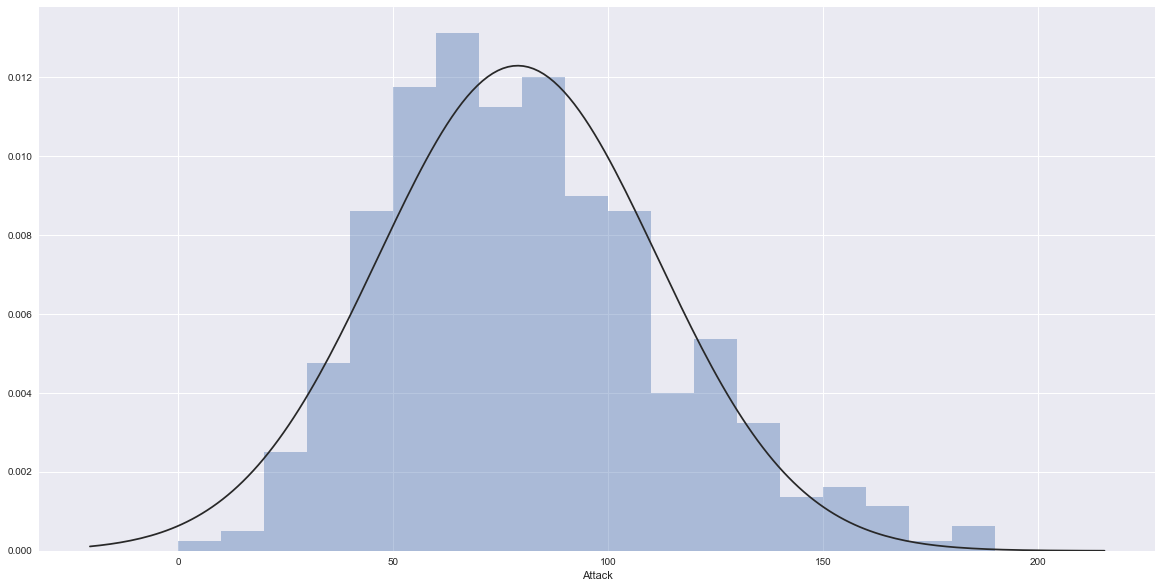

In [18]:
from scipy.stats import norm
bins = range(0, 200, 10)

sns.distplot(df['Attack'], bins=bins, kde=False, fit=norm);

### Comparação Ataque vs Defesa

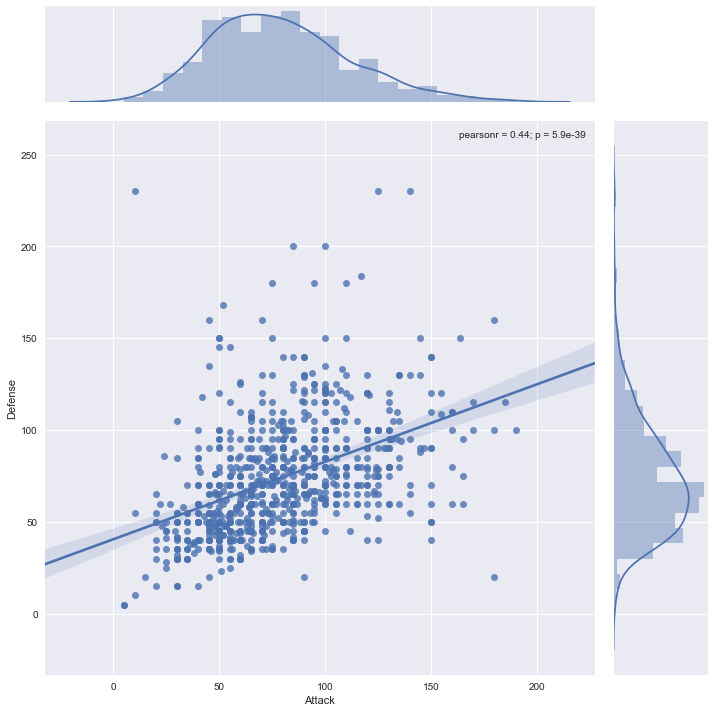

In [19]:
sns.jointplot(x="Attack", y="Defense", data=df, kind='reg', size=10);

### Fogo vs Água vs Planta

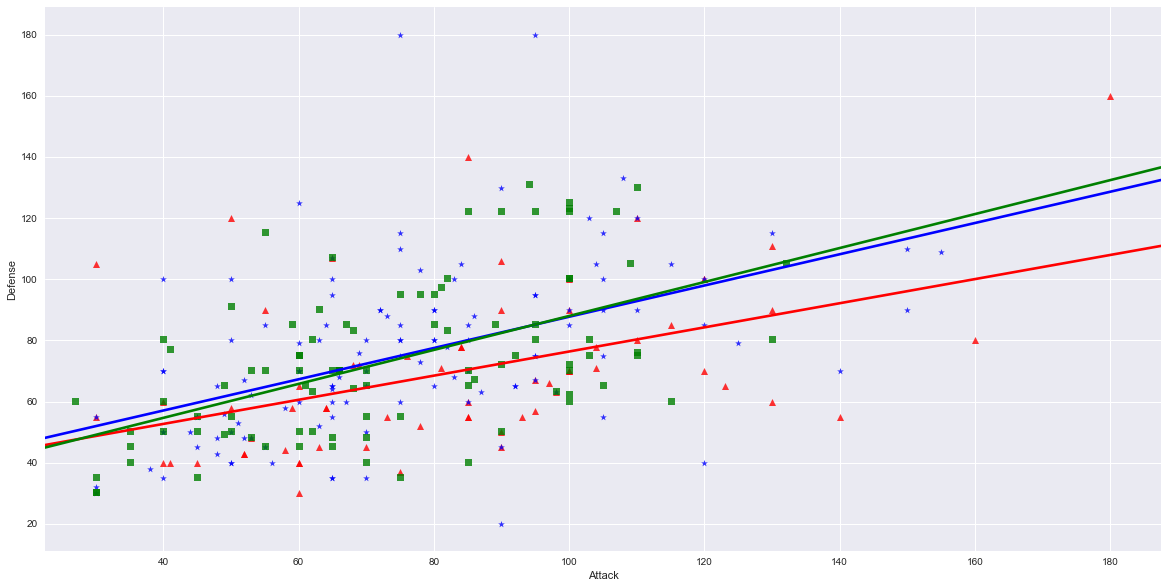

In [20]:
fogo = df[(df['Type 1'] == 'Fire') | (df['Type 2'] == 'Fire')]
agua = df[(df['Type 1'] == 'Water') | (df['Type 2'] == 'Water')]
planta = df[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Grass')]

sns.regplot(x='Attack', y='Defense', data=fogo, ci=None, fit_reg=True, color='red', marker='^');
sns.regplot(x='Attack', y='Defense', data=agua, ci=None, fit_reg=True, color='blue', marker='*');
sns.regplot(x='Attack', y='Defense', data=planta, ci=None, fit_reg=True, color='green', marker=',');

### Pokemons mais fortes por tipo

In [21]:
strong = df.sort_values(by='Total', ascending=False)
strong.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3
Arceus,Normal,Normal,720,120,120,120,120,120,120,4
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2
GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2


### Visualização dos tipos

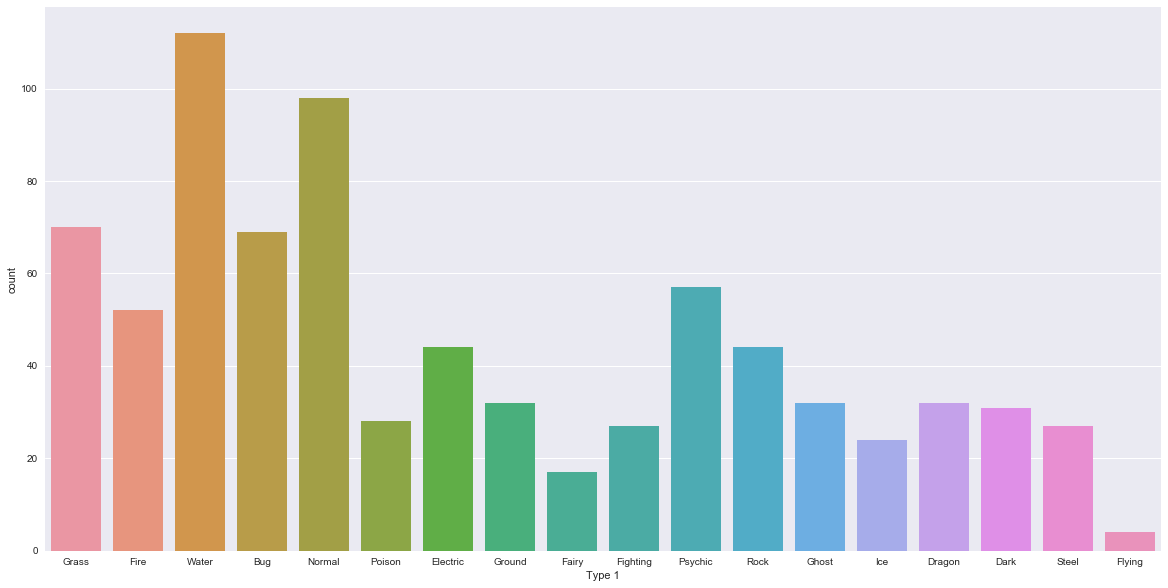

In [22]:
order = df['Type 1'].value_counts().index
sns.countplot(x='Type 1', data=df);

### Análise de todos os stats

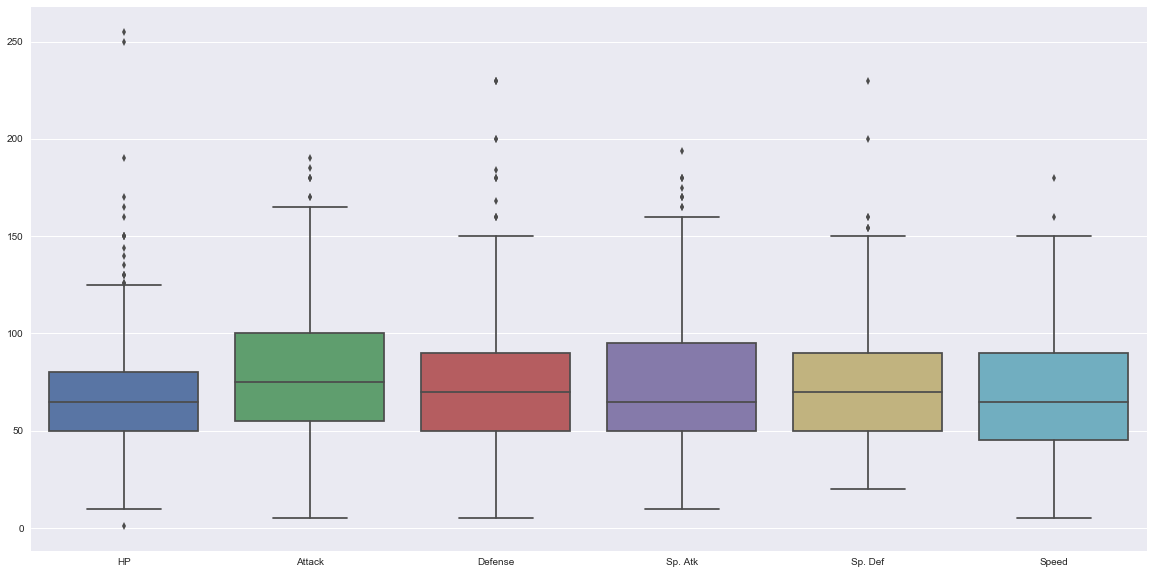

In [23]:
df2 = df.drop(['Generation', 'Total'], axis=1)
sns.boxplot(data=df2);

### Gráficos de correlação

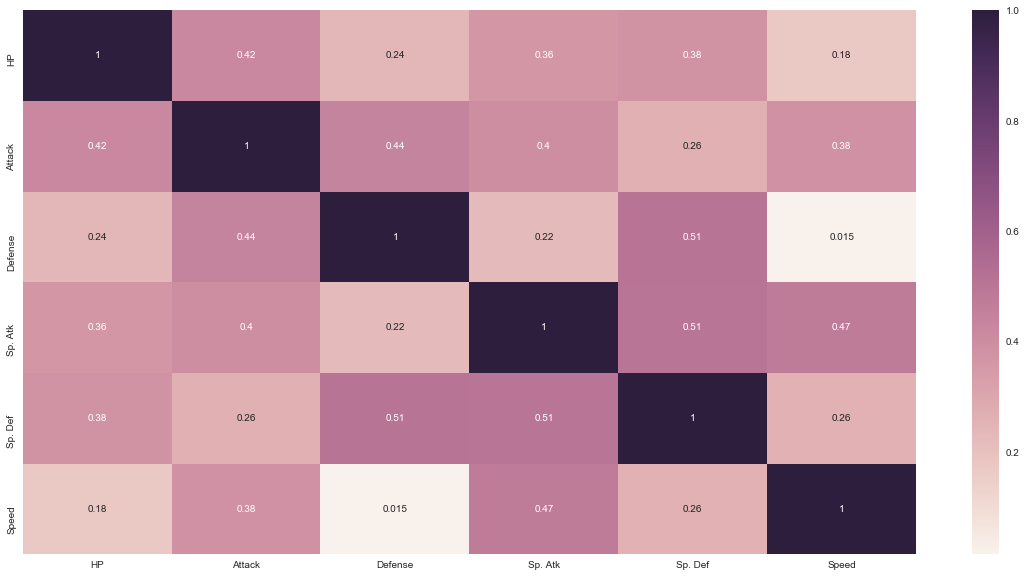

In [24]:
sns.heatmap(df2.corr(), annot=True);

### Ataque por Tipo

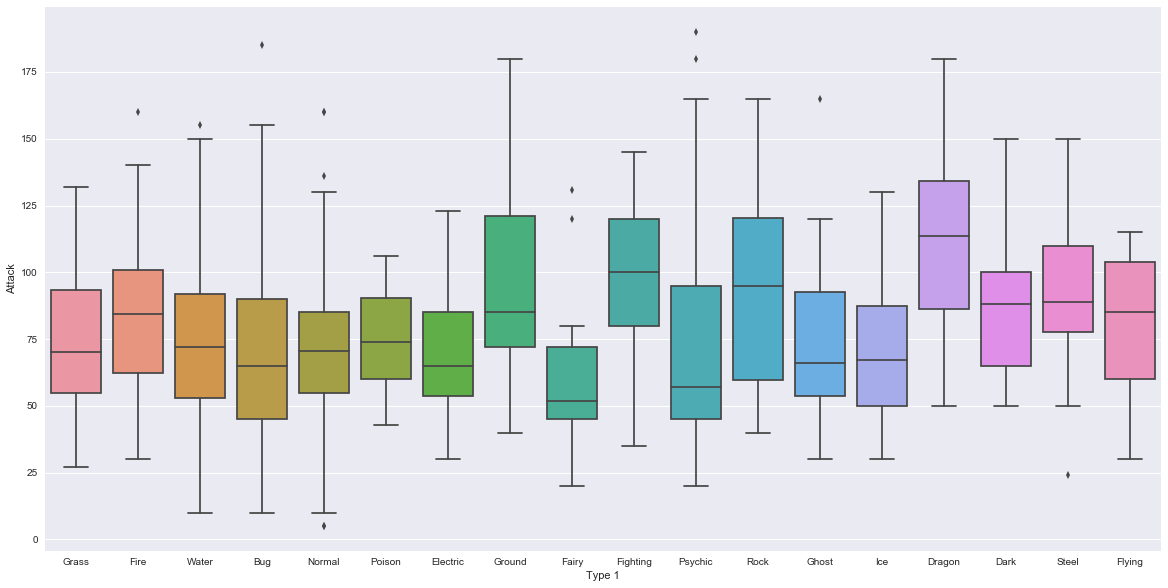

In [25]:
sns.boxplot(x='Type 1', y='Attack', data=df);

### Ataque por Tipo (ViolinPlot)

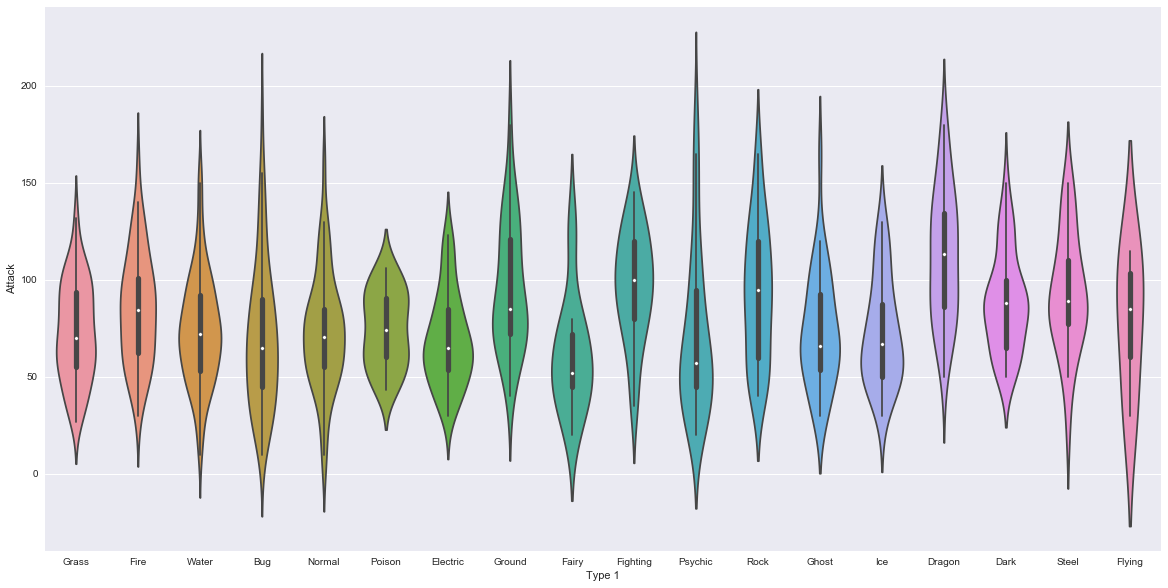

In [26]:
sns.violinplot(x='Type 1', y='Attack', data=df);

### Melhor Geração

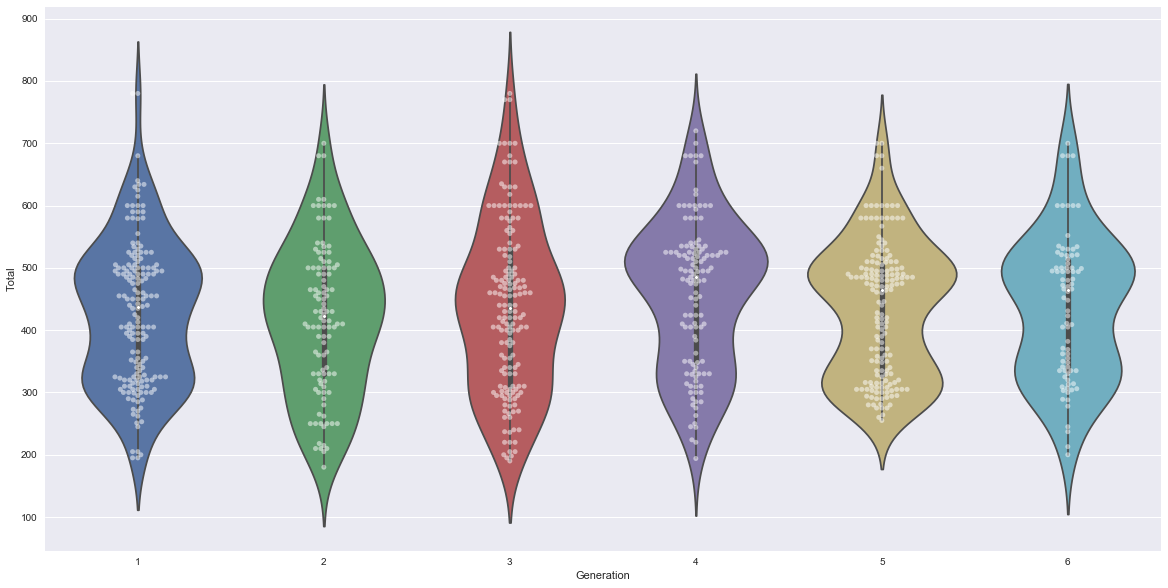

In [27]:
sns.swarmplot(x='Generation', y='Total', data=df, color='white', alpha=.5);
sns.violinplot(x='Generation', y='Total', data=df);